In [1]:
# DOCUMENTATION OF DATASETS FROM KAGGLE: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset

# Content
    # Data from the 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, and 2021 Division I college basketball seasons.
    # cbb.csv has seasons 2013-2019 combined
    # The 2020 season's data set is kept separate from the other seasons, because there was no postseason due to the Coronavirus.
    # The 2021 data is from 3/15/2021 and will be updated and added to cbb.csv after the tournament

# Variables
    # RK (Only in cbb20): The ranking of the team at the end of the regular season according to barttorvik
    # TEAM: The Division I college basketball school
    # CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)
    # G: Number of games played
    # W: Number of games won
    # ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
    # ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
    # BARTHAG: Power Rating (Chance of beating an average Division I team)
    # EFG_O: Effective Field Goal Percentage Shot
    # EFG_D: Effective Field Goal Percentage Allowed
    # TOR: Turnover Percentage Allowed (Turnover Rate)
    # TORD: Turnover Percentage Committed (Steal Rate)
    # ORB: Offensive Rebound Rate
    # DRB: Offensive Rebound Rate Allowed
    # FTR : Free Throw Rate (How often the given team shoots Free Throws)
    # FTRD: Free Throw Rate Allowed
    # 2P_O: Two-Point Shooting Percentage
    # 2P_D: Two-Point Shooting Percentage Allowed
    # 3P_O: Three-Point Shooting Percentage
    # 3P_D: Three-Point Shooting Percentage Allowed
    # ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)
    # WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
    # POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)
    # SEED: Seed in the NCAA March Madness Tournament
    # YEAR: Season

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_context('talk')

cbb = pd.read_csv("cbb.csv")
cbb13 = pd.read_csv("cbb13.csv")
cbb14 = pd.read_csv("cbb14.csv")
cbb15 = pd.read_csv("cbb15.csv")
cbb16 = pd.read_csv("cbb16.csv")
cbb17 = pd.read_csv("cbb17.csv")
cbb18 = pd.read_csv("cbb18.csv")
cbb19 = pd.read_csv("cbb19.csv")
cbb20 = pd.read_csv("cbb20.csv")
cbb21 = pd.read_csv("cbb21.csv")

In [3]:
cbb.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,36.8,50.0,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014
6,Michigan,B10,38,30,121.5,93.7,0.9522,54.6,48.0,14.6,...,22.7,53.4,47.6,37.9,32.6,64.8,6.2,2ND,4.0,2013
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017


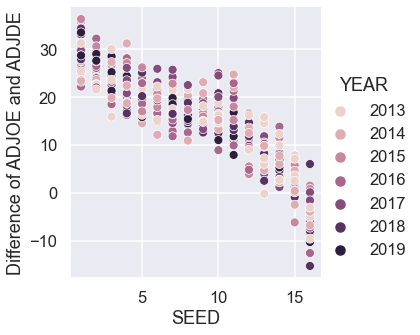

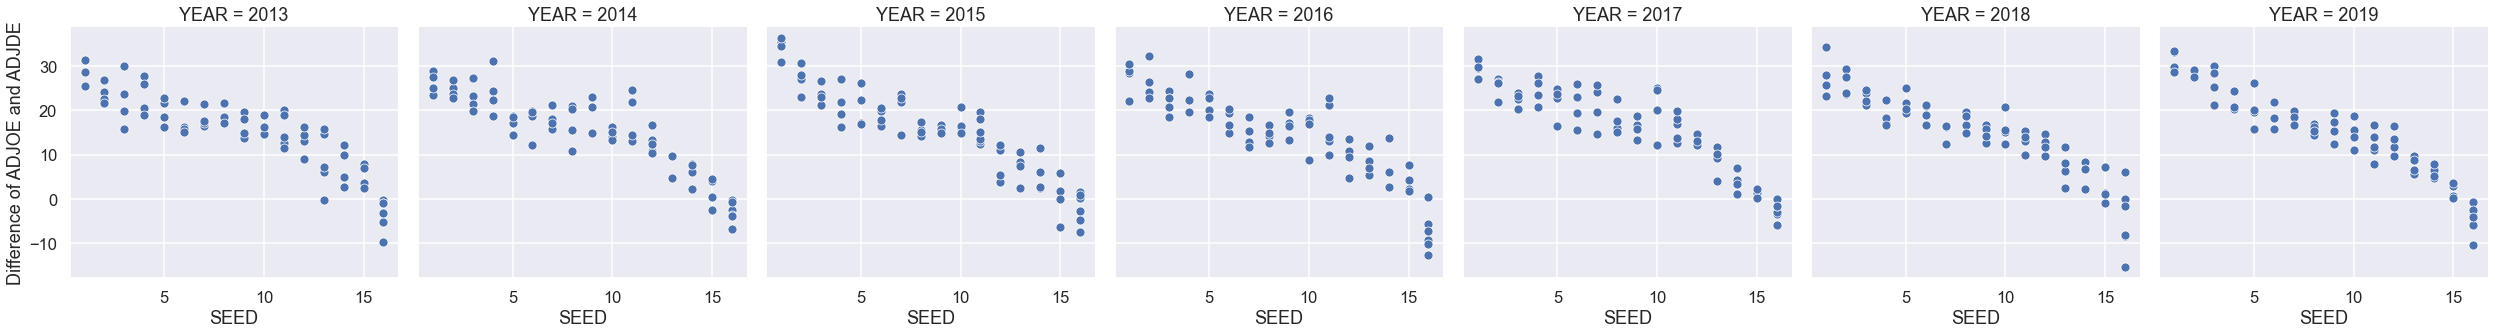

In [4]:
# SEED VS DIFFERENCE OF ADJOE AND ADJDE (scatter plot)
# SEED: Seed in the NCAA March Madness Tournament
#DIFFERENCE OF ADJOE AND ADJDE:  (ADJOE - ADJDE)
# ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
# ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)


seed_def = cbb.dropna() #setting inplace=True modifies the current dataframe instead of returning a new one
seed_def = seed_def.reset_index(drop=True)
seed_def["Difference of ADJOE and ADJDE"] = seed_def["ADJOE"]-seed_def["ADJDE"]

sns.relplot(data=seed_def, x="SEED", y="Difference of ADJOE and ADJDE", hue="YEAR")
sns.relplot(data=seed_def, x="SEED", y="Difference of ADJOE and ADJDE", col="YEAR")

The trend of the plot (and subplots) shows that as the difference between ADJOE and ADJDE decreases so does seed ranking.

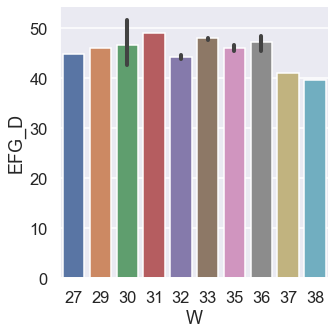

In [5]:
# EFG_D  VS W (bar plot)
# W: NUmber of Games Won for teams that played at least 39 games
# EFG_D: Effective Field Goal Percentage Allowed

tord_w = cbb.dropna()
tord_w = tord_w.loc[tord_w['G'] >= 39, :]
tord_w = tord_w.reset_index(drop=True)   # drop=True drops the column of the previous indices that is produced from .reset_index()

sns.catplot(y='EFG_D', x='W', kind="bar", data=tord_w)

In [6]:
# final_fours = final fours teams from 2013 to 2019

final_fours = cbb.loc[(cbb['POSTSEASON']=='Champions') | (cbb['POSTSEASON']=='2ND') | (cbb['POSTSEASON']=='F4'),:].reset_index(drop=True)

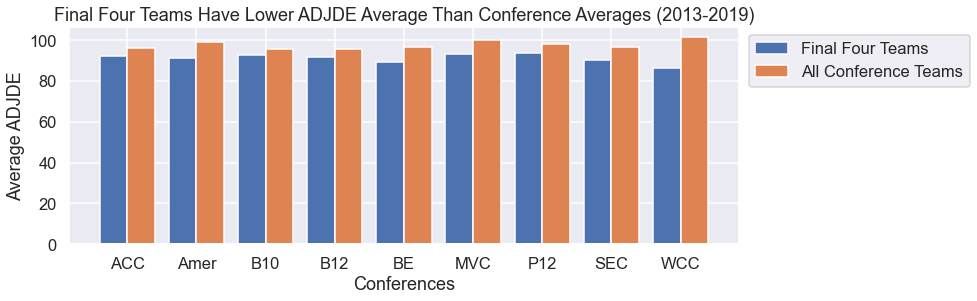

In [7]:
#CONFERENCES VS ADJDE (BAR PLOT) FOR FINAL FOUR TEAMS 2012-2019
# ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)


final_fours_mean = final_fours.groupby('CONF').mean()

conf_avg_adjde = cbb.dropna()
conf_av_adjde = cbb.loc[cbb['CONF'].isin(final_fours_mean.index.tolist()),:]
conf_avg_adjde = conf_av_adjde.groupby("CONF").mean()

# Source: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

fig = plt.figure()
axis = final_fours_mean.index
axis_spacing = np.arange(len(axis))
plt.bar(axis_spacing - 0.2, 'ADJDE', 0.4, label = 'Final Four Teams', data= final_fours_mean)
plt.bar(axis_spacing + 0.2, 'ADJDE', 0.4, label = 'All Conference Teams', data=conf_avg_adjde)

plt.xticks(axis_spacing, axis)
plt.xlabel("Conferences")
plt.ylabel("Average ADJDE")
plt.title("Final Four Teams Have Lower ADJDE Average Than Conference Averages (2013-2019)")
fig.set_figwidth(12)
plt.legend(loc='upper center',bbox_to_anchor=(1.18, 1))
plt.show()

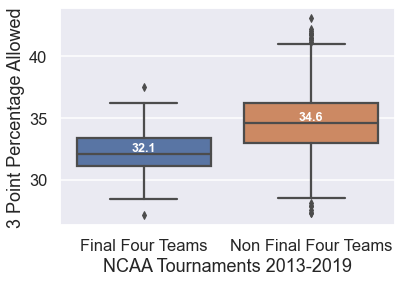

In [8]:
# 3P_D BOX PLOT FOR FINAL FOUR TEAMS VS NON FINAL FOUR TEAMS
# 3P_D: Three-Point Shooting Percentage Allowed

final_fours_cbb = pd.DataFrame()
final_fours_cbb = cbb
final_fours_cbb['3 Point Percentage Allowed'] = cbb['3P_D']
# creates new column of either of the two values based on condition
final_fours_cbb['NCAA Tournaments 2013-2019'] = np.where((cbb['POSTSEASON']=='Champions') | (cbb['POSTSEASON']=='2ND') | (cbb['POSTSEASON']=='F4'),'Final Four Teams','Non Final Four Teams')


# Source: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value
box_plot = sns.boxplot(y='3 Point Percentage Allowed', x='NCAA Tournaments 2013-2019', data=final_fours_cbb)

medians = final_fours_cbb.groupby(['NCAA Tournaments 2013-2019'])['3 Point Percentage Allowed'].median()
vertical_offset = final_fours_cbb['3 Point Percentage Allowed'].median() * 0.005 # offset from median for display
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], horizontalalignment='center',size='x-small',color='w',weight='semibold')

This bar graph shows that for each conference the teams that made the final four have an lower average ADJDE than the entire conference (using cumulative data from 2013-2019), which is expected.

In [9]:

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(seed_def)